In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print("This is as of " + str(datetime.now()))

This is as of 2017-08-08 18:34:54.644180


In [2]:
# Get the latest data from the Chicago data portal right now
%run "Get beach_days from API.ipynb"
beach_days.head()

Deleting columns: 
There are 20 beaches


,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
0,53.916602,4894,"{'type': 'Point', 'coordinates': [-87.6235, 41...",2017-08-08,Oak Street,93.9
1,35.944402,4893,"{'type': 'Point', 'coordinates': [-87.6152, 41...",2017-08-08,Ohio Street,118.4
2,145.965749,4887,"{'type': 'Point', 'coordinates': [-87.5636, 41...",2017-08-08,South Shore,NaN
3,78.083289,4890,"{'type': 'Point', 'coordinates': [-87.5976, 41...",2017-08-08,Oakwood,180.4
4,96.332757,4898,"{'type': 'Point', 'coordinates': [-87.6564, 42...",2017-08-08,Hartigan (Albion),95.4


In [3]:
# How many days of samples were taken
print("Samples were taken across %s days" % len(beach_days['date'].unique()))

Samples were taken across 75 days


In [4]:
print("There are %s total beach-days, and %s unique predictions" %
     (str(len(beach_days)), str(len(beach_days.loc[~beach_days['predicted_level'].isnull()]))))

There are 1483 total beach-days, and 969 unique predictions


In [5]:
beach_days['elevated'] = beach_days['dna_reading_mean'] >= 1000
beach_days['predicted_elevated'] = beach_days['predicted_level'] >=250

beach_days.head(10)

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level,elevated,predicted_elevated
0,53.916602,4894,"{'type': 'Point', 'coordinates': [-87.6235, 41...",2017-08-08,Oak Street,93.9,False,False
1,35.944402,4893,"{'type': 'Point', 'coordinates': [-87.6152, 41...",2017-08-08,Ohio Street,118.4,False,False
2,145.965749,4887,"{'type': 'Point', 'coordinates': [-87.5636, 41...",2017-08-08,South Shore,NaN,False,False
3,78.083289,4890,"{'type': 'Point', 'coordinates': [-87.5976, 41...",2017-08-08,Oakwood,180.4,False,False
4,96.332757,4898,"{'type': 'Point', 'coordinates': [-87.6564, 42...",2017-08-08,Hartigan (Albion),95.4,False,False
5,178.370401,4889,"{'type': 'Point', 'coordinates': [-87.5797, 41...",2017-08-08,57th Street,168.7,False,False
6,170.850812,4896,"{'type': 'Point', 'coordinates': [-87.6385, 41...",2017-08-08,Montrose,NaN,False,False
7,381.428892,4899,"{'type': 'Point', 'coordinates': [-87.6635, 42...",2017-08-08,Leone,97.6,False,False
8,44.988888,4892,"{'type': 'Point', 'coordinates': [-87.6083, 41...",2017-08-08,12th Street,166.6,False,False
9,165.438810,4905,"{'type': 'Point', 'coordinates': [-87.6273, 41...",2017-08-08,North Avenue,90.1,False,False


In [6]:
predicted_days = beach_days.loc[~beach_days['predicted_level'].isnull()]
len(predicted_days)

969

In [7]:
measured_days = beach_days.loc[~beach_days['dna_reading_mean'].isnull()]
len(measured_days)

1483

In [8]:
days_with_both = predicted_days.loc[~predicted_days['dna_reading_mean'].isnull()]
len(days_with_both)

969

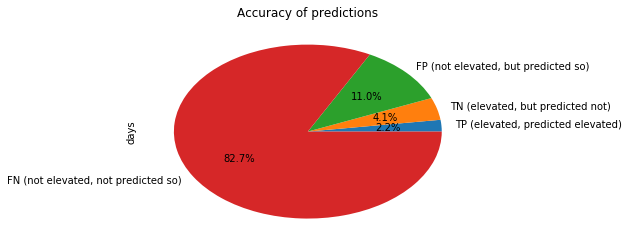

In [9]:
a = pd.DataFrame()
a = a.append(
    [['TP (elevated, predicted elevated)',
         len(days_with_both.loc[(days_with_both['predicted_elevated']) & (days_with_both['elevated'])])],
         ['TN (elevated, but predicted not)',
         len(days_with_both.loc[(days_with_both['predicted_elevated'] == 0) & (days_with_both['elevated'])])],
         ['FP (not elevated, but predicted so)',
         len(days_with_both.loc[(days_with_both['predicted_elevated']) & (0 == days_with_both['elevated'])])],
         ['FN (not elevated, not predicted so)',
         len(days_with_both.loc[(0 == days_with_both['predicted_elevated']) & (0 == days_with_both['elevated'])])]
    ]
)
a.columns = ['label', 'days']
a = a.set_index('label')
a['days'].plot(kind="pie", title="Accuracy of predictions", autopct='%1.1f%%')

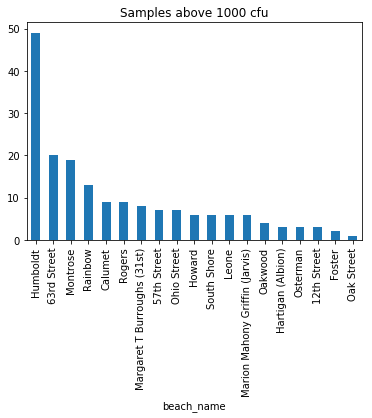

In [10]:
# For the DNA testing, the threshold for an advisory is 1000 CFU.  How many beaches exceed that?
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('beach_name').count()['date']\
    .sort_values(ascending=False).plot(kind="bar", title="Samples above 1000 cfu")

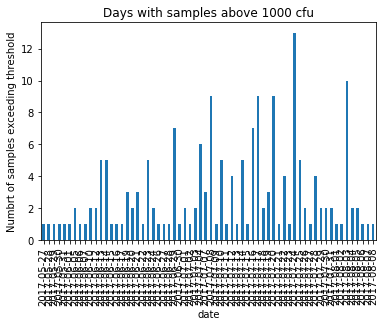

In [11]:
beach_days.loc[beach_days['dna_reading_mean'] >= 1000].groupby('date').count()['location']\
    .plot(kind="bar", title="Days with samples above 1000 cfu").set_ylabel("Numbrt of samples exceeding threshold")

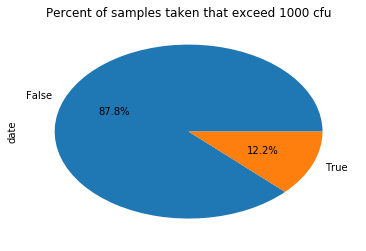

In [12]:
# Samples that exceed threshold
beach_days['dna_exceeds'] = beach_days['dna_reading_mean'] > 1000
beach_days.groupby('dna_exceeds').count()['date'].plot(kind="pie", title="Percent of samples taken that exceed 1000 cfu", autopct='%1.1f%%')

In [13]:
# What have been the highest readings so far?
beach_days.sort_values('dna_reading_mean', ascending=False)[['beach_name', 'date', 'dna_reading_mean']].head(20)

,beach_name,date,dna_reading_mean
379,63rd Street,2017-07-20,39300.270686
353,Montrose,2017-07-22,20935.984859
66,Humboldt,2017-08-05,17936.299786
388,12th Street,2017-07-20,17325.351771
28,Humboldt,2017-08-07,14186.839394
374,Humboldt,2017-07-20,13512.746649
51,Humboldt,2017-08-06,13472.736136
184,Humboldt,2017-07-30,11263.178947
1123,63rd Street,2017-06-13,9386.074046
309,Calumet,2017-07-24,8998.190651
